In [14]:
import pandas as pd
import sqlite3

# CSV ფაილების ჩატვირთვა
general_df = pd.read_csv("GeneralEsportData.csv")
historical_df = pd.read_csv("HistoricalEsportData.csv")

# ახალი SQLite მონაცემთა ბაზის შექმნა და კავშირის გახსნა
conn = sqlite3.connect("cybersport.sqlite")

# CSV-ებიდან მონაცემების შეტანა ბაზაში, ცხრილების სახელებით
general_df.to_sql("GeneralEsportData", conn, if_exists="replace", index=False)
historical_df.to_sql("HistoricalEsportData", conn, if_exists="replace", index=False)

conn.commit()

print("✅ მონაცემთა ბაზა შექმნილია და ცხრილები დამატებულია.")


✅ მონაცემთა ბაზა შექმნილია და ცხრილები დამატებულია.


In [15]:
cursor = conn.cursor()
cursor.execute("SELECT name FROM sqlite_master WHERE type='table';")
tables = cursor.fetchall()

print("📋 ცხრილები ბაზაში:")
for table in tables:
    print("-", table[0])

📋 ცხრილები ბაზაში:
- GeneralEsportData
- HistoricalEsportData


In [16]:
cursor.execute("SELECT Game, TotalEarnings FROM GeneralEsportData WHERE Genre = 'Strategy'")
strategy_games = cursor.fetchall()

print("🎮 სტრატეგიული ჟანრის თამაშები და მათი მოგება:")
for game in strategy_games:
    print(game)

#ამით ვკითხულობთ და ვბეჭდავთ სტრატეგიული ჟანრის თამაშებს ბაზიდან.

🎮 სტრატეგიული ჟანრის თამაშები და მათი მოგება:
('Age of Empires', 736284.75)
('Age of Empires II', 3898508.73)
('Age of Empires III', 122256.72)
('Age of Empires IV', 1190813.44)
('Age of Empires Online', 11462.98)
('Age of Mythology', 188619.58)
('Among Us', 86000.0)
('Auto Chess', 1163720.28)
('Brawl Stars', 8141511.8)
('Chess.com', 8609043.36)
('chess24', 4318475.43)
('chessarena.com', 263363.64)
('Clash of Clans', 6085742.37)
('Clash Royale', 9059840.93)
('Clash Royale x Chess', 0.0)
('Command & Conquer 3', 53086.67)
('Command & Conquer: Red Alert', 15000.0)
('Company of Heroes 2', 8561.22)
('ComPet', 2000.0)
('Dead By Daylight', 60000.0)
('Dead by Daylight Mobile', 10000.0)
('Dota Underlords', 26024.18)
('Endgods', 0.0)
('Farming Simulator 19', 689617.9)
('Farming Simulator 22', 181663.39)
('GeoGuessr', 74653.5)
('Grey Goo', 36400.0)
('Heroes of Might and Magic III', 0.0)
('Identity V', 5796530.92)
('Internet Chess Club', 10000.0)
('Iron Harvest', 0.0)
('Legion TD 2', 0.0)
('Liches

In [17]:
new_game = input("შეიყვანეთ ახალი თამაშის სახელი: ")
release_year = input("გამოშვების წელი: ")
genre = input("ჟანრი: ")
total_earnings = float(input("სრული მოგება: "))
offline_earnings = float(input("ოფლაინ მოგება: "))
percent_offline = offline_earnings / total_earnings if total_earnings != 0 else 0
total_players = int(input("მოთამაშეების რაოდენობა: "))
total_tournaments = int(input("ტურნირების რაოდენობა: "))

cursor.execute("""
    INSERT INTO GeneralEsportData (Game, ReleaseDate, Genre, TotalEarnings, OfflineEarnings, PercentOffline, TotalPlayers, TotalTournaments)
    VALUES (?, ?, ?, ?, ?, ?, ?, ?)
""", (new_game, release_year, genre, total_earnings, offline_earnings, percent_offline, total_players, total_tournaments))

conn.commit()

print("✅ ახალი ჩანაწერი დაემატა ბაზაში.")

#მომხმარებლის შეყვანილი მონაცემებით ვამატებთ ახალ ჩანაწერს GeneralEsportData ცხრილში.

KeyboardInterrupt: Interrupted by user

In [18]:
game_to_update = input("შეიყვანეთ თამაშის სახელი, რომლის ჩანაწერსაც განაახლებთ: ")
new_genre = input("შეიყვანეთ ახალი ჟანრი: ")

cursor.execute("""
    UPDATE GeneralEsportData
    SET Genre = ?
    WHERE Game = ?
""", (new_genre, game_to_update))

conn.commit()

print(f"✅ ჩანაწერი განახლდა: {game_to_update}–ს ახალი ჟანრი არის {new_genre}.")

#მომხმარებლის მიერ შეყვანილი თამაშის სახის მიხედვით ვაახლებთ მის ჟანრს ბაზაში.

KeyboardInterrupt: Interrupted by user

In [19]:
game_to_delete = input("შეიყვანეთ თამაშის სახელი, რომლის ჩანაწერსაც წაშლით: ")

cursor.execute("""
    DELETE FROM GeneralEsportData
    WHERE Game = ?
""", (game_to_delete,))

conn.commit()

print(f"✅ ჩანაწერი წაიშალა: {game_to_delete}.")

#მომხმარებლის მიერ შეყვანილი თამაშის სახელით ვშლით ჩანაწერს ბაზიდან.

✅ ჩანაწერი წაიშალა: .


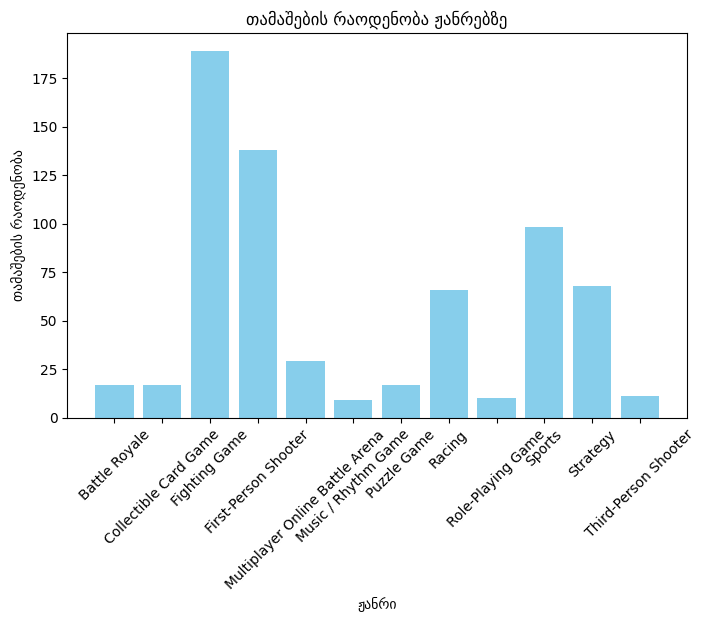

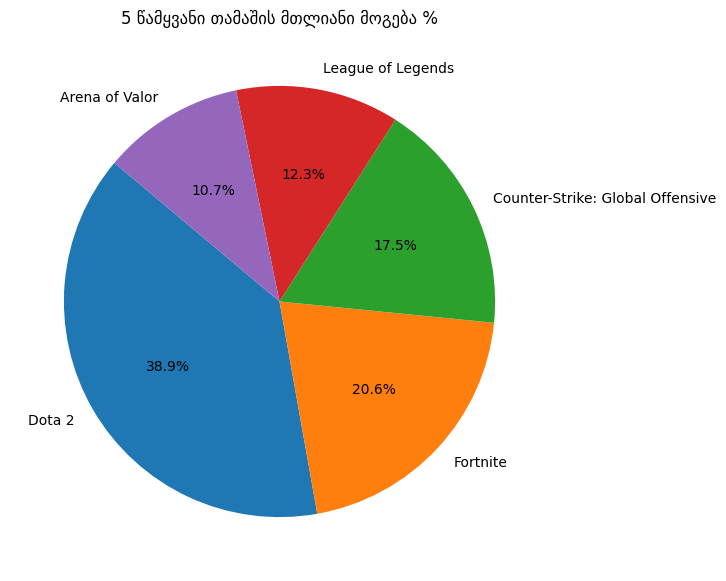

თქვენი მიერ შეყვანილი თამაშის ისტორიული მონაცემები არ მოიძებნა.


In [20]:
import matplotlib.pyplot as plt

# 7.1 ბარის დიაგრამა - თამაშების რაოდენობა ჟანრებზე
cursor.execute("SELECT Genre, COUNT(*) FROM GeneralEsportData GROUP BY Genre")
data = cursor.fetchall()
genres = [row[0] for row in data]
counts = [row[1] for row in data]

plt.figure(figsize=(8,5))
plt.bar(genres, counts, color='skyblue')
plt.title("თამაშების რაოდენობა ჟანრებზე")
plt.xlabel("ჟანრი")
plt.ylabel("თამაშების რაოდენობა")
plt.xticks(rotation=45)
plt.show()

#ბარის დიაგრამა გვიჩვენებს, რომელი ჟანრის რამდენი თამაშია ბაზაში.

# 7.2 პიცის დიაგრამა - მთლიანი მოგების განაწილება 5 წამყვან თამაშზე

cursor.execute("""
    SELECT Game, TotalEarnings
    FROM GeneralEsportData
    ORDER BY TotalEarnings DESC LIMIT 5
""")
top_games = cursor.fetchall()
games = [x[0] for x in top_games]
earnings = [x[1] for x in top_games]

plt.figure(figsize=(7,7))
plt.pie(earnings, labels=games, autopct='%1.1f%%', startangle=140)
plt.title("5 წამყვანი თამაშის მთლიანი მოგება %")
plt.show()

#პიცის დიაგრამა გვიჩვენებს, როგორ ნაწილდება მთლიანი მოგება წამყვან 5 თამაშს შორის.

# 7.3 ხაზოვანი დიაგრამა - ისტორიული მოგების ცვლილება ერთ კონკრეტულ თამაშზე

game_name = input("შეიყვანეთ თამაშის სახელი ისტორიული მოგების გრაფიკისთვის: ")

cursor.execute("""
    SELECT Date, Earnings FROM HistoricalEsportData WHERE Game = ? ORDER BY Date
""", (game_name,))
history = cursor.fetchall()

if history:
    dates = [row[0] for row in history]
    earnings = [row[1] for row in history]

    plt.figure(figsize=(10,5))
    plt.plot(dates, earnings, marker='o', linestyle='-', color='green')
    plt.title(f"მოგების ცვლილება დროში: {game_name}")
    plt.xlabel("თარიღი")
    plt.ylabel("მოგება")
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("თქვენი მიერ შეყვანილი თამაშის ისტორიული მონაცემები არ მოიძებნა.")

#ხაზოვანი დიაგრამა აჩვენებს ისტორიულ მოგებას კონკრეტული თამაშისთვის დროში.

In [ ]:
conn.close()

print("✅ მონაცემთა ბაზასთან კავშირი დაიხურა.")

#ვწყვეტთ კავშირს SQLite მონაცემთა ბაზასთან.